In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1 Independent analysis of the datasets

**The function below normalizes, filters and clusters the data. The function calls are made individually below.**

In [2]:
def ind_analysis(adata):
    adata.var_names_make_unique()

    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    print("QC Metrics")
    sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                 jitter=0.4, multi_panel=True)
    print("---------")


    sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
    sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

    adata = adata[adata.obs.n_genes_by_counts < 2500, :]
    adata = adata[adata.obs.pct_counts_mt < 5, :]
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    print("Highly variable genes")
    sc.pl.highly_variable_genes(adata)
    print("---------")

    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.scale(adata)



    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=20, n_pcs=50)
    sc.tl.umap(adata)
    print("UMAP")
    sc.pl.umap(adata)
    print("---------")

    sc.tl.leiden(adata)
    print("UMAP coloured by clusters")
    sc.pl.umap(adata, color=['leiden'])
    print("---------")

    sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
    print("Differentially expressed genes in each cluster")
    sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
    print("---------")

    marker_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'][:2])
    print("List of marker genes for each cluster")
    print(marker_genes)
    print("---------")

    # sc.pl.umap(adata,color='S100A8')
    sc.tl.leiden(adata)
    print("Violin plot for genes of interest")
    sc.pl.violin(adata, ['S100A8', 'S100A9','FCGR3A'], groupby='leiden')
    print("---------")
    print("UMAP coloured by genes of interest")
    sc.pl.umap(adata, color=['S100A8', 'S100A9','FCGR3A'])
    print("---------")
    
    return adata

**The results for the MH001 dataset**

QC Metrics


---------


/Users/sharanvenkatesh/opt/anaconda3/envs/Diff_exp/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Highly variable genes


---------
UMAP


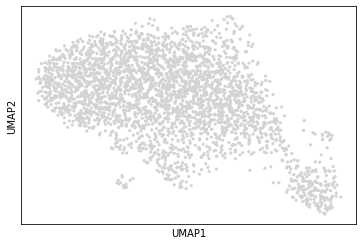

---------
UMAP coloured by clusters


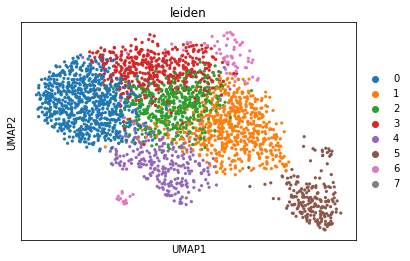

---------
Differentially expressed genes in each cluster


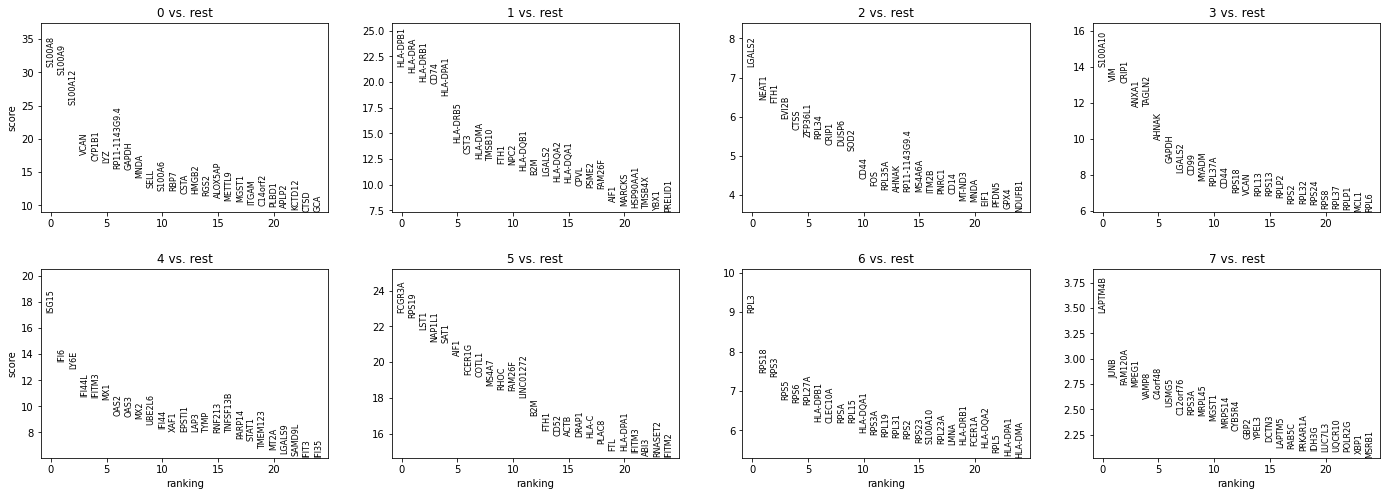

---------
List of marker genes for each cluster
        0         1       2        3      4       5      6        7
0  S100A8  HLA-DPB1  LGALS2  S100A10  ISG15  FCGR3A   RPL3  LAPTM4B
1  S100A9   HLA-DRA   NEAT1      VIM   IFI6   RPS19  RPS18     JUNB
---------
Violin plot for genes of interest


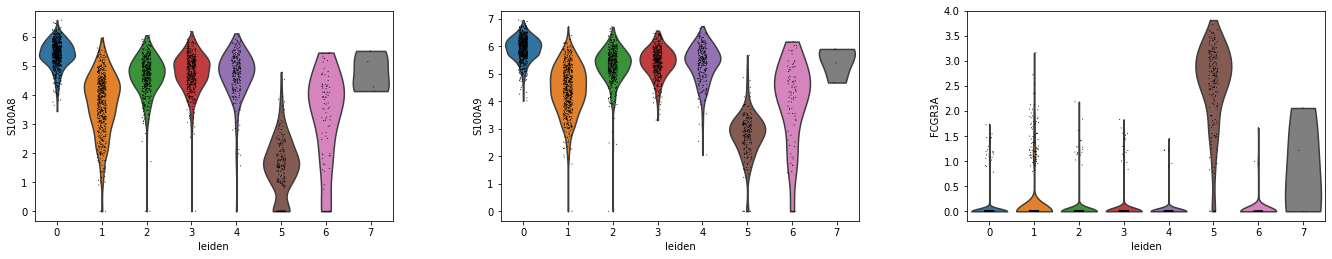

---------
UMAP coloured by genes of interest


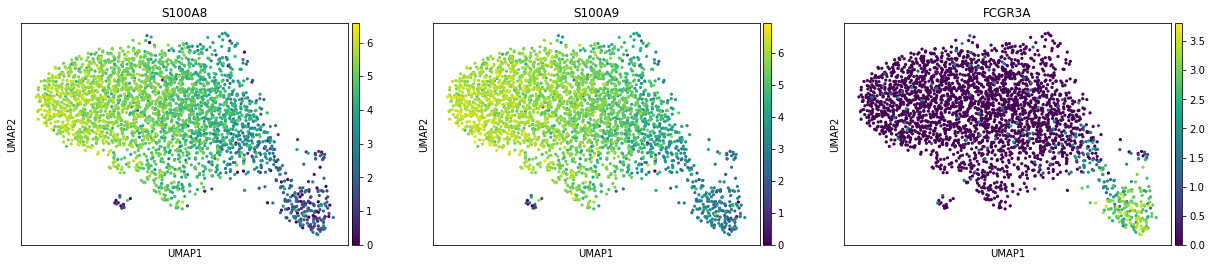

---------


In [3]:
adata_1 = sc.read_10x_mtx('BSTA787_HW2_Data/MH001',var_names='gene_symbols', cache=True)
adata_1_new = ind_analysis(adata_1)

From these plots, it is clear that the non classical monocytes are present in cluster 5. Also, cluster 0 has the highest expression of the marker genese for classical monocytes. Although it is hard to tell from this plot, it is concurrent with the differentially expressed genes table obtained above this plot. Thus, the cluster 0 contains classical monocytes

**The results for the RP002 dataset**

QC Metrics


---------


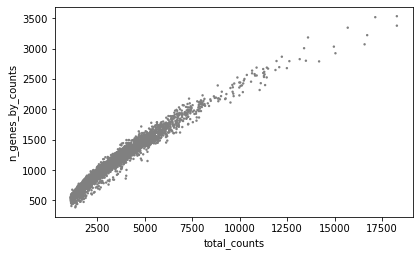

/Users/sharanvenkatesh/opt/anaconda3/envs/Diff_exp/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Highly variable genes


---------
UMAP


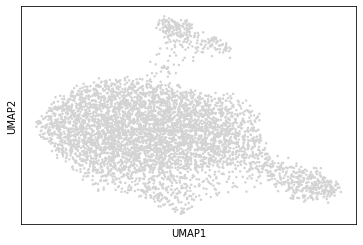

---------
UMAP coloured by clusters


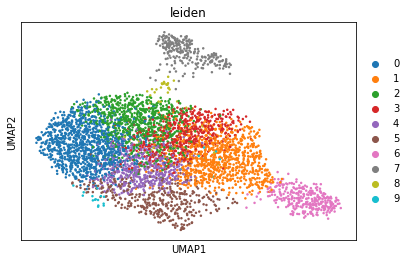

---------
Differentially expressed genes in each cluster


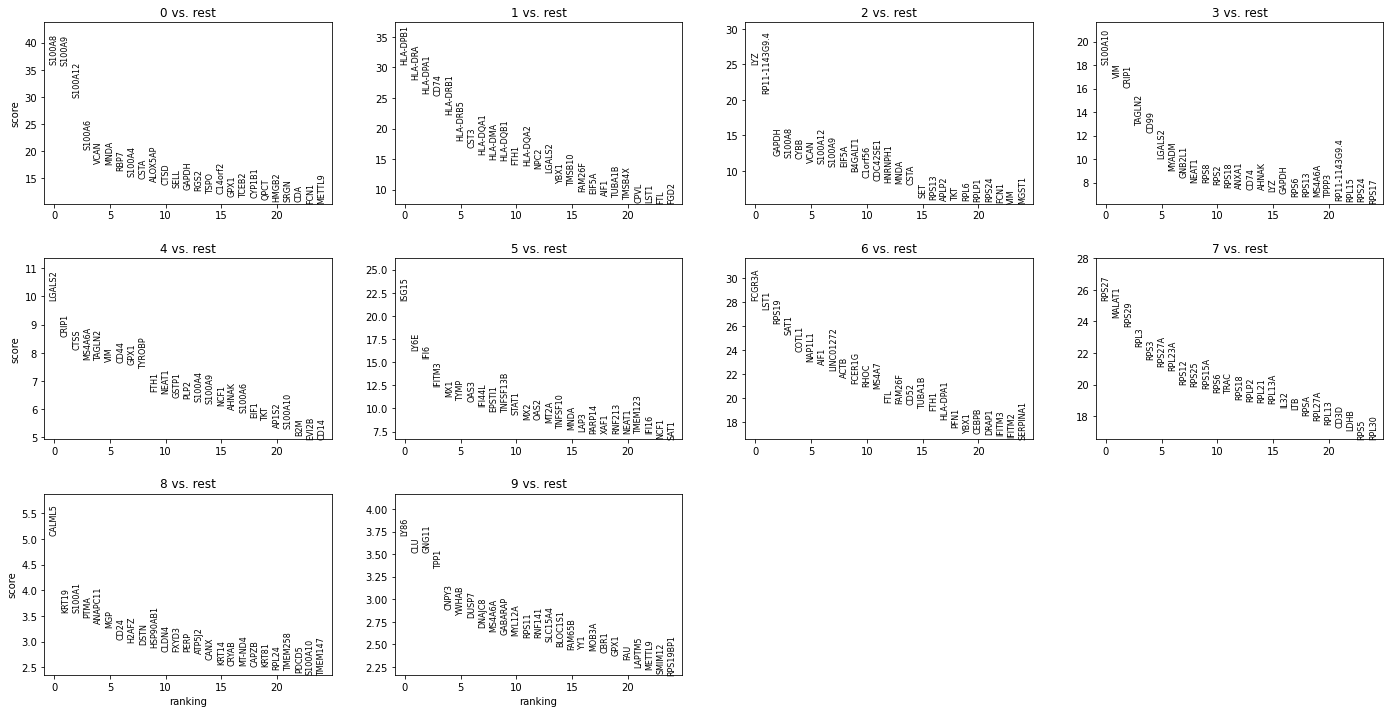

---------
List of marker genes for each cluster
        0         1              2        3       4      5       6       7  \
0  S100A8  HLA-DPB1            LYZ  S100A10  LGALS2  ISG15  FCGR3A   RPS27   
1  S100A9   HLA-DRA  RP11-1143G9.4      VIM   CRIP1   LY6E    LST1  MALAT1   

        8     9  
0  CALML5  LY86  
1   KRT19   CLU  
---------
Violin plot for genes of interest


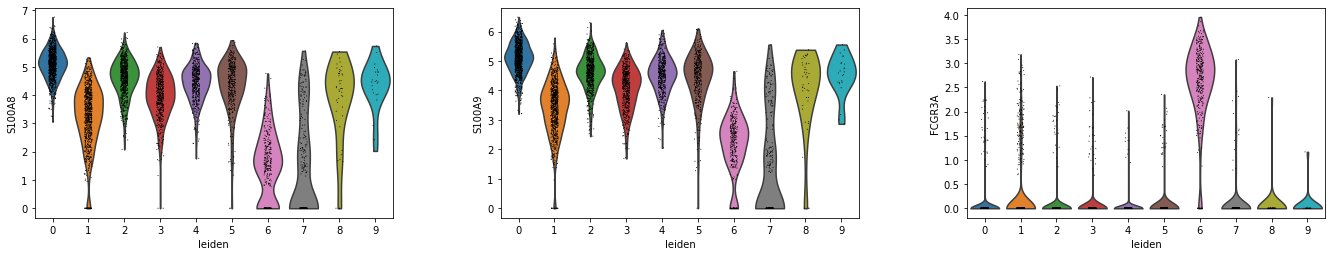

---------
UMAP coloured by genes of interest


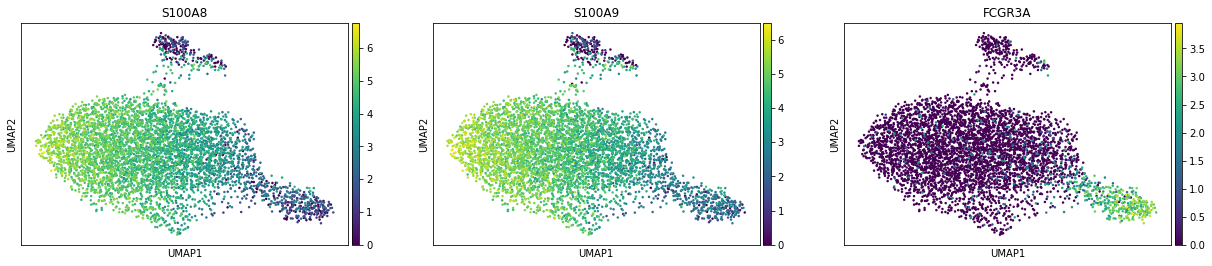

---------


In [4]:
adata_2 = sc.read_10x_mtx('BSTA787_HW2_Data/RP002',var_names='gene_symbols', cache=True)
adata_2_new = ind_analysis(adata_2)

In this dataset, we can see the non classical monocytes in cluster 6. We also see the highest expression of the classical moncytes in cluster 0

**The results for the RP009 dataset**

QC Metrics


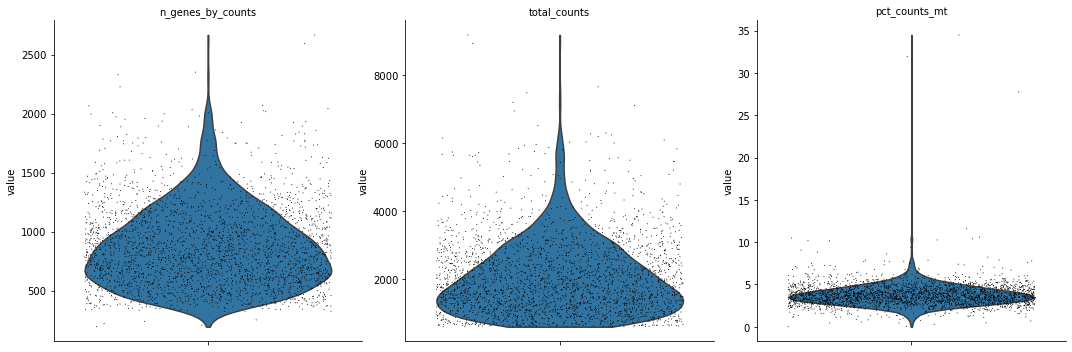

---------


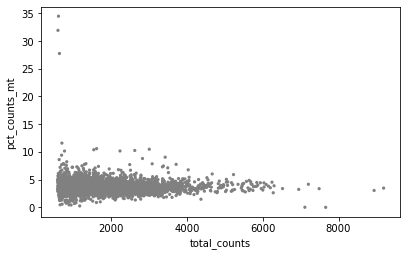

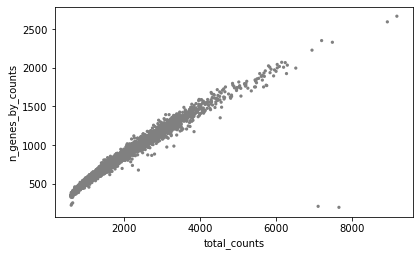

/Users/sharanvenkatesh/opt/anaconda3/envs/Diff_exp/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Highly variable genes


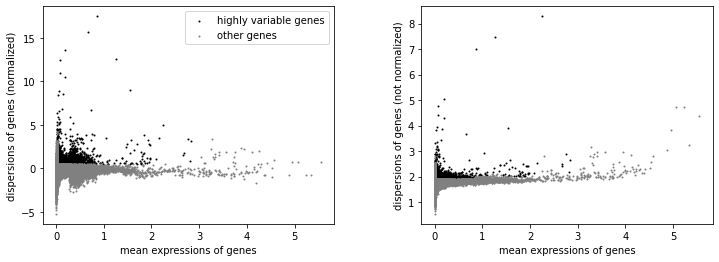

---------
UMAP


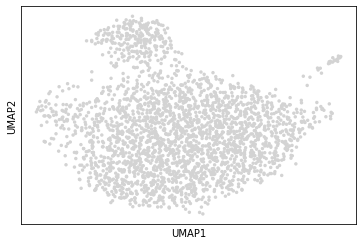

---------
UMAP coloured by clusters


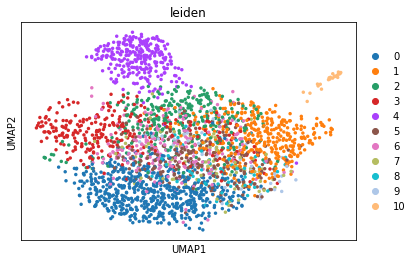

---------
Differentially expressed genes in each cluster


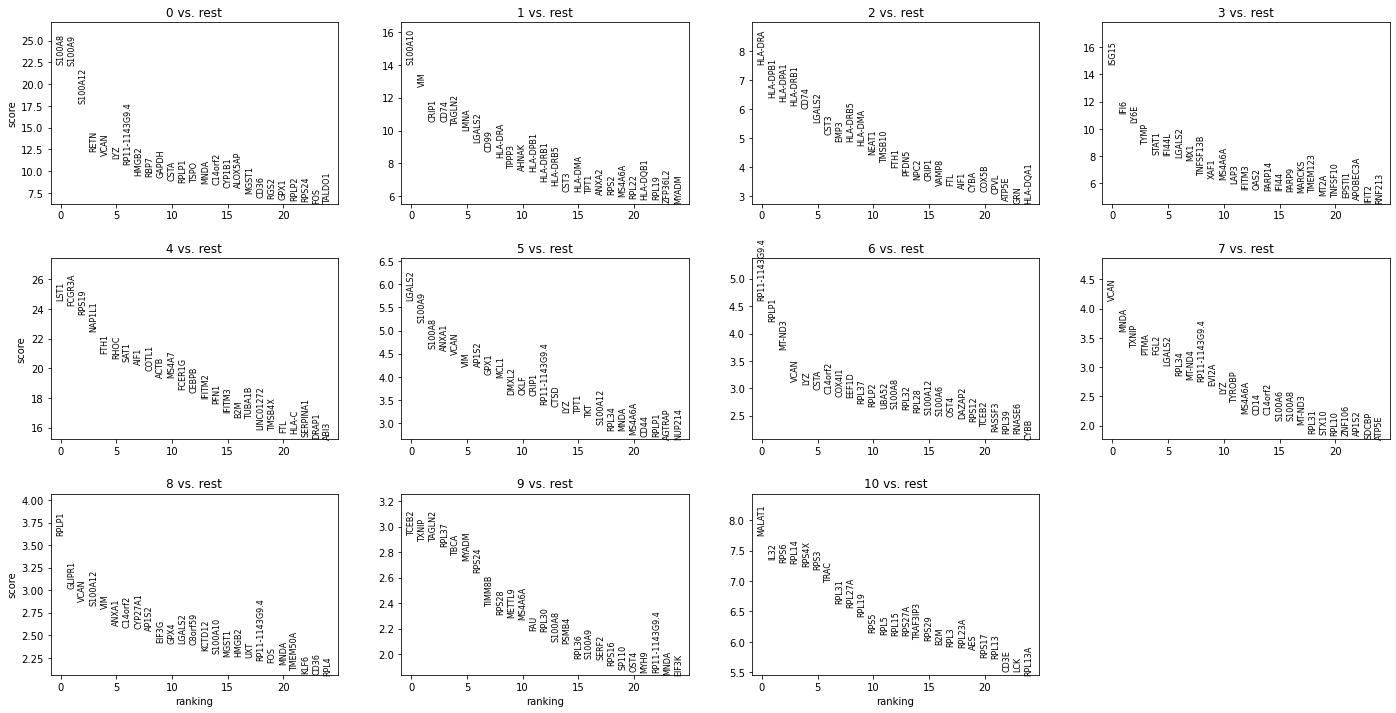

---------
List of marker genes for each cluster
        0        1         2      3       4       5              6     7  \
0  S100A8  S100A10   HLA-DRA  ISG15    LST1  LGALS2  RP11-1143G9.4  VCAN   
1  S100A9      VIM  HLA-DPB1   IFI6  FCGR3A  S100A9          RPLP1  MNDA   

        8      9      10  
0   RPLP1  TCEB2  MALAT1  
1  GLIPR1  TXNIP    IL32  
---------
Violin plot for genes of interest


---------
UMAP coloured by genes of interest


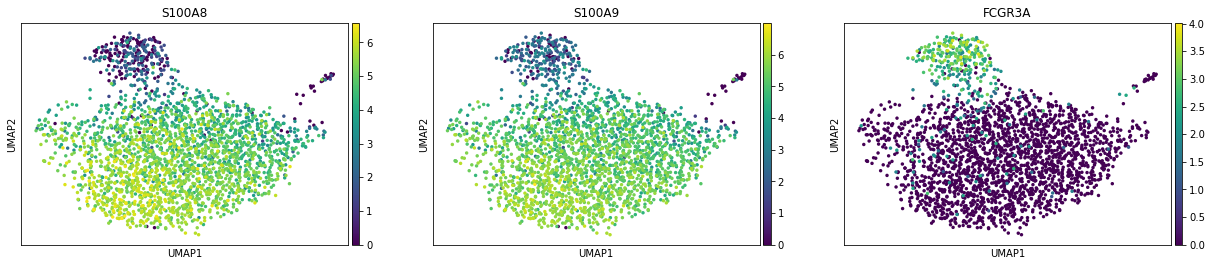

---------


In [5]:
adata_3 = sc.read_10x_mtx('BSTA787_HW2_Data/RP009',var_names='gene_symbols', cache=True)
adata_new_3 = ind_analysis(adata_3)

In this dataset, it is clear from the violin and umap plots that cluster 4 contains non classical monocytes. Classical monocytes seem to be expressed hihgly in cluster 0.

## Q2 Integrated analysis

**The function below combines the 3 datasets into one using the batch bbalanced knn (bbknn) algorithm provided as part of the scanpy package.**

In [6]:
def int_analysis(adata_1,adata_2,adata_3): 
    
    adata_1.obs['sample'] = ['MH001' for x in adata_1.obs.n_genes]
    adata_2.obs['sample'] = ['RP002' for x in adata_2.obs.n_genes]
    adata_3.obs['sample'] = ['RP009' for x in adata_3.obs.n_genes]

    var_names = adata_1.var_names.intersection(adata_2.var_names)
    var_names_all = adata_3.var_names.intersection(var_names)

    adata_1 = adata_1[:, var_names_all]
    adata_2 = adata_2[:, var_names_all]
    adata_3 = adata_3[:, var_names_all]

    adata_concat = adata_1.concatenate(adata_2)
    adata_concat = adata_concat.concatenate(adata_3)
    
#     sc.pp.filter_cells(adata_concat, min_genes=200)
#     sc.pp.filter_genes(adata_concat, min_cells=3)
#     adata_concat.var['mt'] = adata_concat.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

#     adata_concat = adata_concat[adata_concat.obs.n_genes_by_counts < 2500, :]
#     adata_concat = adata_concat[adata_concat.obs.pct_counts_mt < 5, :]
#     sc.pp.normalize_total(adata_concat, target_sum=1e4)
#     sc.pp.log1p(adata_concat)
#     sc.pp.highly_variable_genes(adata_concat, min_mean=0.0125, max_mean=3, min_disp=0.5)

#     adata_concat.raw = adata_concat
#     adata_concat = adata_concat[:, adata_concat.var.highly_variable]
#     sc.pp.regress_out(adata_concat, ['total_counts', 'pct_counts_mt'])
#     sc.pp.scale(adata_concat)
    
    sc.tl.pca(adata_concat)
    sc.external.pp.bbknn(adata_concat, batch_key='sample',neighbors_within_batch=10)  # running bbknn 1.3.6
    sc.tl.umap(adata_concat)
    print("Integrated UMAP, coloured by datasets")
    sc.pl.umap(adata_concat, color=['sample'])
    print("---------")

    sc.tl.leiden(adata_concat,resolution = 0.6)
    print("Integrated UMAP, coloured by clusters")
    sc.pl.umap(adata_concat, color=['leiden'])
    print("---------")
    #sc.tl.paga(adata_concat)
    #sc.pl.paga(adata_concat)  # remove `plot=False` if you want to see the coarse-grained graph
    #sc.tl.umap(adata_concat, init_pos='paga')

    sc.tl.rank_genes_groups(adata_concat, 'leiden', method='wilcoxon')
    print("The differentialy expressed genes in each cluster")
    sc.pl.rank_genes_groups(adata_concat, n_genes=25, sharey=False)
    print("---------")

    marker_genes = pd.DataFrame(adata_concat.uns['rank_genes_groups']['names'][:2])
    print("Marker genes for each cluster")
    print(marker_genes)
    print("---------")

    print("Violin plots for the genes of interest")
    sc.pl.violin(adata_concat, ['S100A8', 'S100A9','FCGR3A'], groupby='leiden')
    print("---------")
    print("UMAP coloured by genes of interest")
    sc.pl.umap(adata_concat, color=['S100A8', 'S100A9','FCGR3A'])
    print("---------")


**The graph below is without removing the batch effects.**

In [9]:
adata_1.obs['sample'] = ['MH001' for x in adata_1.obs.n_genes]
adata_2.obs['sample'] = ['RP002' for x in adata_2.obs.n_genes]
adata_3.obs['sample'] = ['RP009' for x in adata_3.obs.n_genes]

var_names = adata_1.var_names.intersection(adata_2.var_names)
var_names_all = adata_3.var_names.intersection(var_names)

adata_1 = adata_1[:, var_names_all]
adata_2 = adata_2[:, var_names_all]
adata_3 = adata_3[:, var_names_all]

adata_concat = adata_1.concatenate(adata_2)
adata_concat = adata_concat.concatenate(adata_3)
adata_concat_2 = adata_concat

/var/folders/d7/rmp03f3547g1kh2yt31bj63r0000gn/T/ipykernel_26108/2671195677.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_1.obs['sample'] = ['MH001' for x in adata_1.obs.n_genes]
/var/folders/d7/rmp03f3547g1kh2yt31bj63r0000gn/T/ipykernel_26108/2671195677.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_2.obs['sample'] = ['RP002' for x in adata_2.obs.n_genes]
/var/folders/d7/rmp03f3547g1kh2yt31bj63r0000gn/T/ipykernel_26108/2671195677.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_3.obs['sample'] = ['RP009' for x in adata_3.obs.n_genes]
/Users/sharanvenkatesh/opt/anaconda3/envs/Diff_exp/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dty

In [10]:
sc.tl.pca(adata_concat_2)
sc.pp.neighbors(adata_concat_2, n_neighbors=20, n_pcs=50)
sc.tl.umap(adata_concat_2)
sc.pl.umap(adata_concat_2, color=['sample'])

The batch effects are clearly visible here. The batches are seperated out.

**The results obtained below are after removing the batch effects between the datasets**

/Users/sharanvenkatesh/opt/anaconda3/envs/Diff_exp/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/sharanvenkatesh/opt/anaconda3/envs/Diff_exp/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Integrated UMAP, coloured by datasets


---------
Integrated UMAP, coloured by clusters


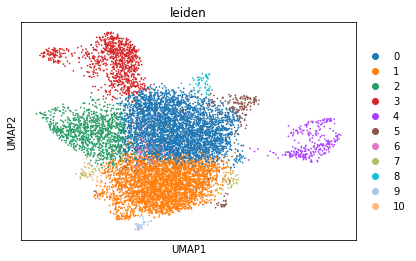

---------
The differentialy expressed genes in each cluster


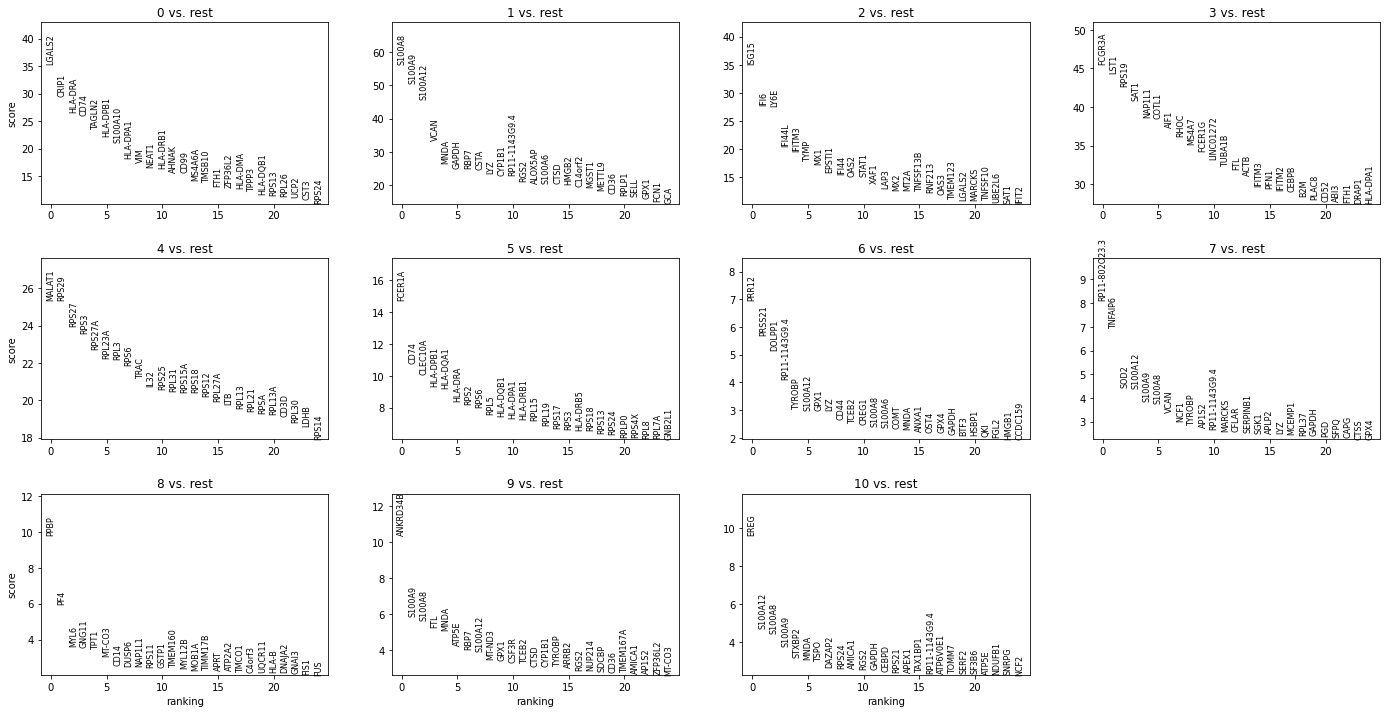

---------
Marker genes for each cluster
        0       1      2       3       4       5       6              7     8  \
0  LGALS2  S100A8  ISG15  FCGR3A  MALAT1  FCER1A   PRR12  RP11-802O23.3  PPBP   
1   CRIP1  S100A9   IFI6    LST1   RPS29    CD74  PRSS21        TNFAIP6   PF4   

          9       10  
0  ANKRD34B     EREG  
1    S100A9  S100A12  
---------
Violin plots for the genes of interest


---------
UMAP coloured by genes of interest


---------


In [11]:
int_analysis(adata_1_new,adata_2_new,adata_new_3)

We observe that there definitely is batch effects in the data before integrating it with the bbknn algorithm. As we can see in the previous cells, the three datasets are seprated completely. But after using the bbknn algorithm, we see that the batch effects have effectively been removed, except for some outliers from the RP002 dataset.

## Q3

The results we obtain from the independent analysis and the integrated analysis are a bit different. We still see that the non classical monocytes and classical monocytes are separated and they have similar values. Both the methods are in agreement with this.

When we look at the differently expressed genes in each cluster, we can see that the genes are different from that obtained from independent analysis. While most of the differentially expressed genes per cluster have appeared in this list, we see the addition of other genes. This could be because now there is more information and this allows us to cluster the data better and into more cell types.

From this we can say that the program succesfully removed the strong batch effects that we observed from the three datasets. Also, it seems that the integration provided more information as we now have 11 clusters in the integrated dataset.

The results we get from this integrated analysis is therefore meaningful and biological observations can be made from this.